In [298]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import UFI

In [271]:
def gen_regr(n):

    x1 = np.random.choice(2, n).reshape((n, 1))
    x2 = np.random.choice(3, n).reshape((n, 1))
    x3 = np.random.choice(4, n).reshape((n, 1))
    x4 = np.random.choice(5, n).reshape((n, 1))
    x5 = np.random.choice(6, n).reshape((n, 1))
    x6 = np.random.choice(7, n).reshape((n, 1))
    x7 = np.random.choice(8, n).reshape((n, 1))
    x8 = np.random.choice(9, n).reshape((n, 1))
    
    x9 = np.random.normal(size = n).reshape((n, 1))
    x9[abs(x9) < 0.7] = 0
    x10 = np.random.normal(size = n).reshape((n, 1))
    x10[abs(x9) < 0.6] = 0
    x11 = np.random.normal(size = n).reshape((n, 1))
    x11[abs(x9) < 0.5] = 0
    x12 = np.random.normal(size = n).reshape((n, 1))
    x12[abs(x9) < 0.4] = 0
    x13 = np.random.normal(size = n).reshape((n, 1))
    x13[abs(x9) < 0.3] = 0
    x14 = np.random.normal(size = n).reshape((n, 1))
    x14[abs(x9) < 0.2] = 0
    x15 = np.random.normal(size = n).reshape((n, 1))
    x15[abs(x9) < 0.1] = 0
    
    x16 = np.random.normal(size = n).reshape((n, 1))
    
    y = x1 + x9
    y = y.ravel() + 3 * np.random.normal(size = n)
    # y = np.random.normal(size = n)
    
    X = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16), axis = 1)
    
    return [X, y]

In [300]:
def gen_regr(n):

    x1 = np.random.choice(2, n).reshape((n, 1))
    x2 = np.random.choice(3, n).reshape((n, 1))
    x3 = np.random.choice(4, n).reshape((n, 1))
    x4 = np.random.choice(5, n).reshape((n, 1))
    x5 = np.random.choice(6, n).reshape((n, 1))
    x6 = np.random.choice(7, n).reshape((n, 1))
    x7 = np.random.choice(8, n).reshape((n, 1))
    x8 = np.random.choice(9, n).reshape((n, 1))
    x9 = np.random.choice(10, n).reshape((n, 1))
    x10 = np.random.choice(11, n).reshape((n, 1))   
    
    y = x1
    y = y.ravel() + 5 * np.random.normal(size = n)
    
    X = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10), axis = 1)
    
    return [X, y]

In [301]:
n = 1000
n_estimators = 100

m = 100

score_SI = pd.DataFrame(columns=['x1','x2','x3','x4','x5', 'x6', 'x7','x8', 'x9', 'x10'])

for i in range(m):
    
    X, y = gen_regr(n)
    
    if i % 5 == 0:
        print(i)
        
    regr = RandomForestRegressor(n_estimators = n_estimators, max_depth = 3)
    regr.fit(X, y)
    
    score_SI.loc[i] = regr.feature_importances_

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [302]:
order = []

for i in range(m):
    temp = list(score_SI.iloc[i].values.copy())
    temp.sort(reverse = True)
    order.append(temp.index(score_SI.iloc[i].values[0]))

print(np.mean(order))

2.71


In [303]:
score_SI.to_csv("score_SI_3.csv", index = False)

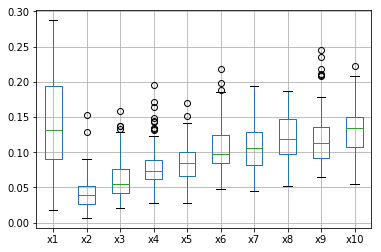

In [304]:
score_SI.boxplot()

In [324]:
n = 1000
n_estimators = 100

m = 100

score_SI = pd.DataFrame(columns=['x1','x2','x3','x4','x5', 'x6', 'x7','x8', 'x9', 'x10'])

for i in range(m):
    
    X, y = gen_regr(n)
    
    if i % 5 == 0:
        print(i)
        
    regr = RandomForestRegressor(n_estimators = n_estimators, max_depth = 10)
    regr.fit(X, y)
    
    score_SI.loc[i] = regr.feature_importances_

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [326]:
order = []

for i in range(m):
    temp = list(score_SI.iloc[i].values.copy())
    temp.sort(reverse = True)
    order.append(temp.index(score_SI.iloc[i].values[0]))

print(np.mean(order))

9.0


In [327]:
score_SI.to_csv("score_SI_10.csv", index = False)

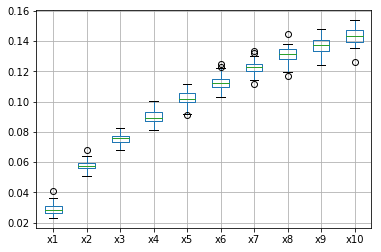

In [328]:
score_SI.boxplot()

In [383]:
n = 1000
n_estimators = 100

m = 100

score_UFI = pd.DataFrame(columns=['x1','x2','x3','x4','x5', 'x6', 'x7', 'x8', 'x9', 'x10'])


for i in range(m):
    
    X, y = gen_regr(n)

    if i % 5 == 0:
        print(i)
        
    regr = RandomForestRegressor(n_estimators = n_estimators, max_depth = 3)
    regr.fit(X, y)
    
    score_UFI.loc[i] = UFI.regr(regr, X, y)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [384]:
order = []

for i in range(m):
    temp = list(score_UFI.iloc[i].values.copy())
    temp.sort(reverse = True)
    order.append(temp.index(score_UFI.iloc[i].values[0]))

print(np.mean(order))

0.47


In [385]:
score_UFI.to_csv("score_UFI_3.csv", index = False)

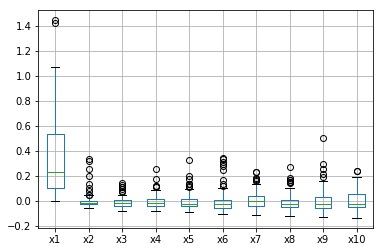

In [386]:
score_UFI.boxplot()

In [316]:
n = 1000
n_estimators = 100

m = 100

score_UFI = pd.DataFrame(columns=['x1','x2','x3','x4','x5', 'x6', 'x7', 'x8', 'x9', 'x10'])


for i in range(m):
    
    X, y = gen_regr(n)

    if i % 5 == 0:
        print(i)
        
    regr = RandomForestRegressor(n_estimators = n_estimators, max_depth = 10)
    regr.fit(X, y)
    
    score_UFI.loc[i] = UFI.regr(regr, X, y)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [320]:
order = []

for i in range(m):
    temp = list(score_UFI.iloc[i].values.copy())
    temp.sort(reverse = True)
    order.append(temp.index(score_UFI.iloc[i].values[0]))

print(np.mean(order))

0.55


In [321]:
score_UFI.to_csv("score_UFI_10.csv", index = False)

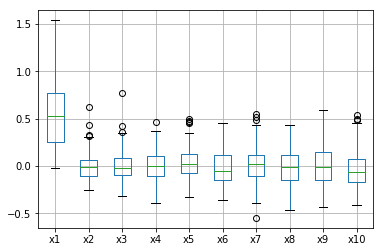

In [323]:
score_UFI.boxplot()

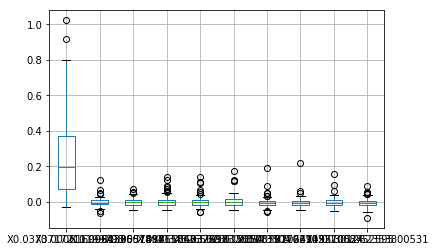

In [390]:
score_cf.boxplot()